# Kallisto Quantification Analysis

In [1]:
import pandas as pd
import os

### Get abundances

In [16]:
#Get files with abundance
samples = os.listdir('../output/')
df = pd.DataFrame()
for sample in samples:
    df1 = pd.read_csv('../output/'+sample+'/abundance.tsv',sep='\t')
    df1['sample'] = sample
    df = pd.concat([df,df1],ignore_index=True)
df

,target_id,length,eff_length,est_counts,tpm,sample
0,ENST00000631435.1,12,13.0000,0.0000,0.000000,CF47004
1,ENST00000434970.2,9,10.0000,0.0000,0.000000,CF47004
2,ENST00000448914.1,13,14.0000,0.0000,0.000000,CF47004
3,ENST00000415118.1,8,9.0000,0.0000,0.000000,CF47004
4,ENST00000632684.1,12,13.0000,0.0000,0.000000,CF47004
...,...,...,...,...,...,...
3963808,ENST00000639790.1,1370,1246.5300,0.0000,0.000000,CF47000
3963809,ENST00000639660.1,284,160.8650,0.0000,0.000000,CF47000
3963810,ENST00000643577.1,105,15.3693,0.0000,0.000000,CF47000
3963811,ENST00000646356.1,900,776.5310,4.0000,0.457853,CF47000


In [3]:
len(df.groupby('sample').count()) # abundances from all 21 samples

21

### Get gene names

In [4]:
annot_df = pd.read_csv('data/ens_transcript_symbol.tsv',sep='\t')
annot_df

,Transcript stable ID,Transcript stable ID version,Gene name
0,ENST00000387314,ENST00000387314.1,MT-TF
1,ENST00000389680,ENST00000389680.2,MT-RNR1
2,ENST00000387342,ENST00000387342.1,MT-TV
3,ENST00000387347,ENST00000387347.2,MT-RNR2
4,ENST00000386347,ENST00000386347.1,MT-TL1
...,...,...,...
256178,ENST00000355360,ENST00000355360.8,PGBD2
256179,ENST00000329291,ENST00000329291.6,PGBD2
256180,ENST00000462488,ENST00000462488.1,PGBD2
256181,ENST00000363625,ENST00000363625.1,RNU6-1205P


In [17]:
# annot_df = annot_df.rename(columns={'Transcript stable ID':'target_id'})
df['Transcript stable ID'] = df['target_id'].str.split('.',expand=True)[0]
df = pd.merge(df,annot_df,how='left')
df

,target_id,length,eff_length,est_counts,tpm,sample,Transcript stable ID,Transcript stable ID version,Gene name
0,ENST00000631435.1,12,13.0000,0.0000,0.000000,CF47004,ENST00000631435,ENST00000631435.1,TRBD1
1,ENST00000434970.2,9,10.0000,0.0000,0.000000,CF47004,ENST00000434970,ENST00000434970.2,TRDD2
2,ENST00000448914.1,13,14.0000,0.0000,0.000000,CF47004,ENST00000448914,ENST00000448914.1,TRDD3
3,ENST00000415118.1,8,9.0000,0.0000,0.000000,CF47004,ENST00000415118,ENST00000415118.1,TRDD1
4,ENST00000632684.1,12,13.0000,0.0000,0.000000,CF47004,ENST00000632684,ENST00000632684.1,TRBD1
...,...,...,...,...,...,...,...,...,...
3963808,ENST00000639790.1,1370,1246.5300,0.0000,0.000000,CF47000,ENST00000639790,ENST00000639790.1,LILRP1
3963809,ENST00000639660.1,284,160.8650,0.0000,0.000000,CF47000,ENST00000639660,ENST00000639660.1,AC245128.19
3963810,ENST00000643577.1,105,15.3693,0.0000,0.000000,CF47000,ENST00000643577,NaN,NaN
3963811,ENST00000646356.1,900,776.5310,4.0000,0.457853,CF47000,ENST00000646356,NaN,NaN


In [6]:
ids_not_found = df['Transcript stable ID'][df['Gene name'].isnull()].tolist()
ids_not_found = [ids.split('.')[0] for ids in ids_not_found]
len(ids_not_found)

44205

### Get sample names

In [46]:
sample_df = pd.read_csv('../../fastq/samples2.txt',sep='\t',header=None)
sample_df = sample_df.rename(columns={0:'gcf_id',1:'sample',2:'sample2',3:'description',4:'sample_type'})
sample_df = sample_df[['sample','sample2','sample_type']].fillna('RNA')
sample_df

,sample,sample2,sample_type
0,CF46798,13-102191,RNA from FFPE
1,CF46799,A-16552,RNA from FFPE
2,CF46800,13-10118,RNA from FFPE
3,CF46801,16-28916,RNA from FFPE
4,CF46802,17-10581,RNA from FFPE
5,CF46803,15-1243B,RNA from FFPE
6,CF46804,17-13391,RNA from FFPE
7,CF46805,15-22128A,RNA from FFPE
8,CF47000,15-36663,RNA from FFPE
9,CF47001,14-31904,RNA from FFPE


In [12]:
fgfrs = ['FGFR1','FGFR2','FGFR3','FGFR4']

In [14]:
df

,target_id,length,eff_length,est_counts,tpm,sample,Transcript stable ID,Transcript stable ID version,Gene name,sample2,sample_type,_merge
0,ENST00000631435.1,12.0,13.000,0.0000,0.000000,CF47004,ENST00000631435,ENST00000631435.1,TRBD1,02-12235,RNA from FFPE,both
1,ENST00000434970.2,9.0,10.000,0.0000,0.000000,CF47004,ENST00000434970,ENST00000434970.2,TRDD2,02-12235,RNA from FFPE,both
2,ENST00000448914.1,13.0,14.000,0.0000,0.000000,CF47004,ENST00000448914,ENST00000448914.1,TRDD3,02-12235,RNA from FFPE,both
3,ENST00000415118.1,8.0,9.000,0.0000,0.000000,CF47004,ENST00000415118,ENST00000415118.1,TRDD1,02-12235,RNA from FFPE,both
4,ENST00000632684.1,12.0,13.000,0.0000,0.000000,CF47004,ENST00000632684,ENST00000632684.1,TRBD1,02-12235,RNA from FFPE,both
...,...,...,...,...,...,...,...,...,...,...,...,...
3963811,ENST00000646356.1,900.0,776.531,4.0000,0.457853,CF47000,ENST00000646356,NaN,NaN,15-36663,RNA from FFPE,both
3963812,ENST00000645792.1,930.0,806.531,48.5179,5.346940,CF47000,ENST00000645792,ENST00000645792.2,OR2A12,15-36663,RNA from FFPE,both
3963813,NaN,NaN,NaN,NaN,NaN,CF47971,NaN,NaN,NaN,15-5817B,RNA,right_only
3963814,NaN,NaN,NaN,NaN,NaN,CF47972,NaN,NaN,NaN,17-10581-PT414(=404),RNA,right_only


In [19]:
df = pd.merge(df,sample_df,how='outer',indicator=True)
df

,target_id,length,eff_length,est_counts,tpm,sample,Transcript stable ID,Transcript stable ID version,Gene name,sample2,sample_type,_merge
0,ENST00000631435.1,12.0,13.000,0.0000,0.000000,CF47004,ENST00000631435,ENST00000631435.1,TRBD1,02-12235,RNA from FFPE,both
1,ENST00000434970.2,9.0,10.000,0.0000,0.000000,CF47004,ENST00000434970,ENST00000434970.2,TRDD2,02-12235,RNA from FFPE,both
2,ENST00000448914.1,13.0,14.000,0.0000,0.000000,CF47004,ENST00000448914,ENST00000448914.1,TRDD3,02-12235,RNA from FFPE,both
3,ENST00000415118.1,8.0,9.000,0.0000,0.000000,CF47004,ENST00000415118,ENST00000415118.1,TRDD1,02-12235,RNA from FFPE,both
4,ENST00000632684.1,12.0,13.000,0.0000,0.000000,CF47004,ENST00000632684,ENST00000632684.1,TRBD1,02-12235,RNA from FFPE,both
...,...,...,...,...,...,...,...,...,...,...,...,...
3963811,ENST00000646356.1,900.0,776.531,4.0000,0.457853,CF47000,ENST00000646356,NaN,NaN,15-36663,RNA from FFPE,both
3963812,ENST00000645792.1,930.0,806.531,48.5179,5.346940,CF47000,ENST00000645792,ENST00000645792.2,OR2A12,15-36663,RNA from FFPE,both
3963813,NaN,NaN,NaN,NaN,NaN,CF47971,NaN,NaN,NaN,15-5817B,RNA,right_only
3963814,NaN,NaN,NaN,NaN,NaN,CF47972,NaN,NaN,NaN,17-10581-PT414(=404),RNA,right_only


In [20]:
#These 3 samples are not matched! Ask Jinhyuk
df[df['sample2'].isnull()].groupby('sample').count()

,target_id,length,eff_length,est_counts,tpm,Transcript stable ID,Transcript stable ID version,Gene name,sample2,sample_type,_merge
sample,,,,,,,,,,,
CF47983,188753,188753,188753,188753,188753,188753,186648,186648,0,0,188753
CF47984,188753,188753,188753,188753,188753,188753,186648,186648,0,0,188753
CF47985,188753,188753,188753,188753,188753,188753,186648,186648,0,0,188753


In [21]:
df[df['target_id'].isnull()].groupby('sample2').count()

,target_id,length,eff_length,est_counts,tpm,sample,Transcript stable ID,Transcript stable ID version,Gene name,sample_type,_merge
sample2,,,,,,,,,,,
15-22128A-PT325,0,0,0,0,0,1,0,0,0,1,1
15-5817B,0,0,0,0,0,1,0,0,0,1,1
17-10581-PT414(=404),0,0,0,0,0,1,0,0,0,1,1


In [22]:
#15-5817B = MD ??
df[['Gene name','est_counts','tpm']][(df['sample']=='CF47983')&(df['Gene name'].isin(fgfrs))].groupby('Gene name').max()

,est_counts,tpm
Gene name,,
FGFR1,172.1400,61.3312
FGFR2,3317.1000,267.9600
FGFR3,34.2758,12.2494
FGFR4,0.0000,0.0000


In [23]:
#17-10581 Pt414 (Pt404) ??
df[['Gene name','est_counts','tpm']][(df['sample']=='CF47984')&(df['Gene name'].isin(fgfrs))].groupby('Gene name').max()

,est_counts,tpm
Gene name,,
FGFR1,33555.1000,89.540100
FGFR2,2580.8000,6.431150
FGFR3,2949.7000,8.801500
FGFR4,13.8374,0.135258


In [24]:
#15-22128A Pt325 ??
df[['Gene name','est_counts','tpm']][(df['sample']=='CF47985')&(df['Gene name'].isin(fgfrs))].groupby('Gene name').max()

,est_counts,tpm
Gene name,,
FGFR1,77777.8000,3140.040000
FGFR2,14.3752,0.989622
FGFR3,74.8932,0.972793
FGFR4,128.9000,3.500690


In [25]:
#PDX325
df[['Gene name','est_counts','tpm']][(df['sample']=='CF47008')&(df['Gene name'].isin(fgfrs))].groupby('Gene name').max()

,est_counts,tpm
Gene name,,
FGFR1,145892.00000,3307.690000
FGFR2,3.76765,0.159292
FGFR3,51.23700,1.265620
FGFR4,194.05600,7.340240


### Check FGFR1,2,3,4 accross samples

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
fgfr_df = df[['sample','sample2','Gene name','tpm']][df['Gene name'].isin(fgfrs)].groupby(['sample','sample2','Gene name'],as_index=False).max()
samples = fgfr_df['sample2'].tolist()
samples = list(set(samples))
matrix_fgfr_df = pd.DataFrame({'Gene name':['FGFR1','FGFR2','FGFR3','FGFR4']})
for sample in samples:
    sample_df = fgfr_df[fgfr_df['sample2']==sample]
    sample_df = sample_df.rename(columns={'tpm':sample})
    sample_df.drop(columns='sample2',inplace=True)
    sample_df = sample_df[['Gene name',sample]]
    matrix_fgfr_df = pd.merge(matrix_fgfr_df,sample_df,how='left')
matrix_fgfr_df = matrix_fgfr_df.set_index('Gene name')
matrix_fgfr_df

,PDX404,M14-1850,PDX420,17-13391,PDX325,17-10581,1332-99,15-1243B,02-12235,A-16552,13-102191,13-10118,15-22128A,14-31904,15-36663,PDX288,15-910A,16-28916
Gene name,,,,,,,,,,,,,,,,,,
FGFR1,167.24100,199.85100,760.92500,310.41900,3307.690000,118.242000,188.56800,153.72200,307.142000,311.49700,175.59600,558.272000,520.76500,89.28170,230.82600,20.45110,20.25600,219.42800
FGFR2,33.85240,18.88050,2.61873,7.91683,0.159292,12.127100,9.49143,46.26690,21.977500,4.43408,5.93804,0.356438,5.43388,1657.48000,7.58161,4.77580,4.11650,64.45720
FGFR3,14.31460,3.97395,10.04630,9.80452,1.265620,7.456050,2.72180,2.86121,0.573429,4.22841,7.34167,5.374150,6.33164,9.09096,3.78468,3.82403,2.96101,15.41970
FGFR4,1.68267,2.83354,52.75450,17.62430,7.340240,0.597099,8.29766,3.31903,5.243100,1.69571,17.14970,0.000000,3.84722,0.59576,9.79205,1.24928,0.17031,4.03124


In [28]:
samples

['PDX404',
 'M14-1850',
 'PDX420',
 '17-13391',
 'PDX325',
 '17-10581',
 '1332-99',
 '15-1243B',
 '02-12235',
 'A-16552',
 '13-102191',
 '13-10118',
 '15-22128A',
 '14-31904',
 '15-36663',
 'PDX288',
 '15-910A',
 '16-28916']

In [29]:
#sort samples by response
samples_by_resp = ['13-102191','A-16552','13-10118','16-28916','17-10581','15-1243B','15-910A',
                  'M14-1850','17-13391','15-22128A','1332-99','15-36663','14-31904','02-12235',
                  'PDX288','PDX404','PDX325','PDX420']
#15-5817B is not here!! This is MD!!

In [30]:
len(samples_by_resp)

18

Text(0.5, 1.0, 'FGFR2')

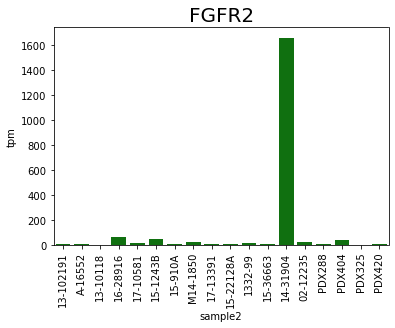

In [35]:
data = fgfr_df[fgfr_df['Gene name']=='FGFR2']
x = data['sample2']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,color='green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('FGFR2',size=20)

Text(0.5, 1.0, 'FGFR1')

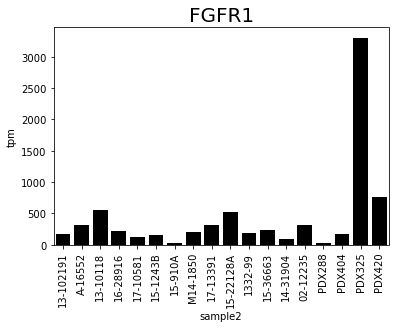

In [36]:
data = fgfr_df[fgfr_df['Gene name']=='FGFR1']
x = data['sample2']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,color='black')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('FGFR1',size=20)

In [37]:
def heatmap (matrix,x=2,y=8,cmap='Reds',norm=False):
    
    matrix = matrix.reindex(columns=samples_by_resp)
    
    if norm == True:
        matrix = matrix.div(matrix.max(axis=1), axis=0)
    plt.figure(figsize=(x,y))
    sns.heatmap(matrix,cmap=cmap,linewidths=1,linecolor='white')
    
    plt.text(x=7,y=-3,s='Patients')
    plt.text(x=3,y=-1,s='NON-RESP')
    plt.text(x=10.5,y=-1,s='RESP')
    plt.text(x=15.5,y=-3,s='PDX')
    plt.text(x=14.2,y=-1,s='NON\nRESP')
    plt.text(x=15.6,y=-1,s='RESP')
    plt.text(x=17.2,y=-1,s='NA')
    plt.text(x=0,y=-0.7,s='_______________________________________________')
    plt.text(x=8.1,y=-0.7,s='__________________________________')
    plt.text(x=14.2,y=-0.7,s='____')
    plt.text(x=15.2,y=-0.7,s='_________')
    plt.text(x=17.2,y=-0.7,s='____')

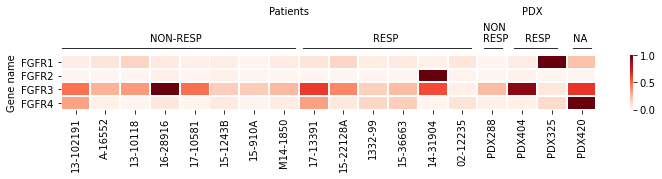

In [38]:
heatmap(matrix_fgfr_df,x=12,y=1,norm=True) #normalised colors by row (gene)

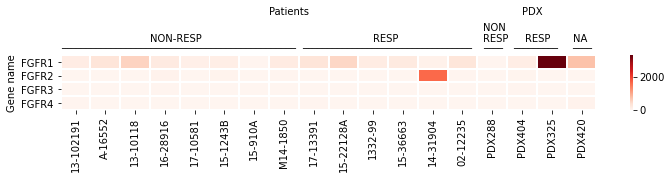

In [39]:
heatmap(matrix_fgfr_df,x=12,y=1) #not normalized

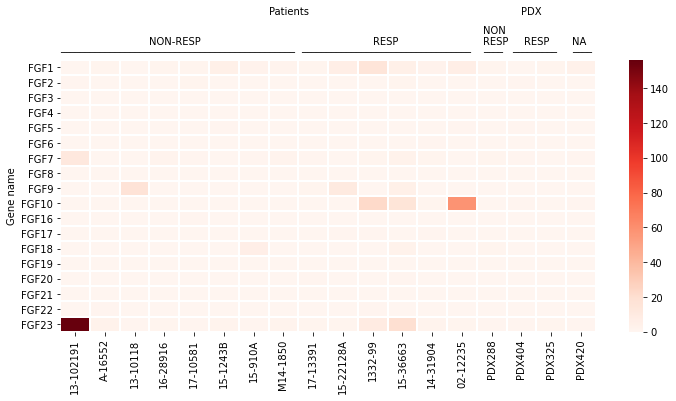

In [40]:
fgfs = ['FGF1','FGF2','FGF3','FGF4','FGF5','FGF6','FGF7','FGF8','FGF9','FGF10',
        'FGF16','FGF17','FGF18','FGF19','FGF20','FGF21','FGF22','FGF23']
#PDX325
fgfr_df = df[['sample','sample2','Gene name','tpm']][df['Gene name'].isin(fgfs)].groupby(['sample','sample2','Gene name'],as_index=False).max()
samples = fgfr_df['sample2'].tolist()
samples = list(set(samples))
matrix_df = pd.DataFrame({'Gene name':fgfs})
for sample in samples:
    sample1_df = fgfr_df[fgfr_df['sample2']==sample]
    sample1_df = sample1_df.rename(columns={'tpm':sample})
    sample1_df.drop(columns='sample2',inplace=True)
    sample1_df = sample1_df[['Gene name',sample]]
    matrix_df = pd.merge(matrix_df,sample1_df,how='left')
matrix_df = matrix_df.set_index('Gene name')
heatmap(matrix_df,x=12,y=5) #not normalized

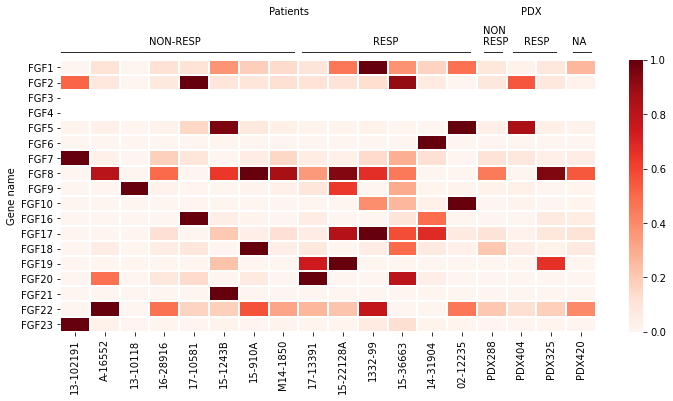

In [41]:
heatmap(matrix_df,x=12,y=5,norm=True) #not normalized

What happen with the most expressing FGFR2 samples??  
If CF47983 is MD sample:

In [42]:
fgfr2_samples = ['CF47983','CF47001']
fgfr2_df = df[(df['sample'].isin(fgfr2_samples))&(df['Gene name']=='FGFR2')]
fgfr2_df

,target_id,length,eff_length,est_counts,tpm,sample,Transcript stable ID,Transcript stable ID version,Gene name,sample2,sample_type,_merge
575814,ENST00000358487.9,4255.0,4112.320,0.000000e+00,0.000000e+00,CF47001,ENST00000358487,ENST00000358487.10,FGFR2,14-31904,RNA from FFPE,both
575815,ENST00000478859.5,3990.0,3847.320,1.113600e+02,2.161780e+00,CF47001,ENST00000478859,ENST00000478859.5,FGFR2,14-31904,RNA from FFPE,both
575816,ENST00000638709.1,1736.0,1593.320,6.487610e+03,3.041050e+02,CF47001,ENST00000638709,ENST00000638709.1,FGFR2,14-31904,RNA from FFPE,both
575817,ENST00000356226.8,3547.0,3404.320,0.000000e+00,0.000000e+00,CF47001,ENST00000356226,ENST00000356226.8,FGFR2,14-31904,RNA from FFPE,both
575818,ENST00000369060.8,3244.0,3101.320,4.590050e+01,1.105380e+00,CF47001,ENST00000369060,ENST00000369060.8,FGFR2,14-31904,RNA from FFPE,both
575819,ENST00000604236.5,3501.0,3358.320,0.000000e+00,0.000000e+00,CF47001,ENST00000604236,ENST00000604236.5,FGFR2,14-31904,RNA from FFPE,both
575820,ENST00000369059.5,3003.0,2860.320,1.679090e+04,4.384310e+02,CF47001,ENST00000369059,ENST00000369059.5,FGFR2,14-31904,RNA from FFPE,both
575821,ENST00000467584.1,497.0,354.315,0.000000e+00,0.000000e+00,CF47001,ENST00000467584,ENST00000467584.1,FGFR2,14-31904,RNA from FFPE,both
575822,ENST00000429361.5,1138.0,995.315,7.727250e+01,5.798360e+00,CF47001,ENST00000429361,ENST00000429361.5,FGFR2,14-31904,RNA from FFPE,both
575823,ENST00000346997.6,2472.0,2329.320,5.169350e+04,1.657480e+03,CF47001,ENST00000346997,ENST00000346997.6,FGFR2,14-31904,RNA from FFPE,both


In [43]:
fgfr2_df.groupby(['sample','Gene name']).max()

,,target_id,length,eff_length,est_counts,tpm,Transcript stable ID,Transcript stable ID version,sample2,sample_type
sample,Gene name,,,,,,,,,
CF47001,FGFR2,ENST00000638709.1,4369.0,4226.32,51693.5,1657.48,ENST00000638709,ENST00000638709.1,14-31904,RNA from FFPE
CF47983,FGFR2,ENST00000638709.1,4369.0,4201.22,3317.1,267.96,ENST00000638709,ENST00000638709.1,NaN,NaN


### Check all counts (quality of the sample)

[Text(0, 0, 'CF46798'),
 Text(1, 0, 'CF46799'),
 Text(2, 0, 'CF46800'),
 Text(3, 0, 'CF46801'),
 Text(4, 0, 'CF46802'),
 Text(5, 0, 'CF46803'),
 Text(6, 0, 'CF46804'),
 Text(7, 0, 'CF46805'),
 Text(8, 0, 'CF47000'),
 Text(9, 0, 'CF47001'),
 Text(10, 0, 'CF47002'),
 Text(11, 0, 'CF47003'),
 Text(12, 0, 'CF47004'),
 Text(13, 0, 'CF47005'),
 Text(14, 0, 'CF47006'),
 Text(15, 0, 'CF47007'),
 Text(16, 0, 'CF47008'),
 Text(17, 0, 'CF47009'),
 Text(18, 0, 'CF47971'),
 Text(19, 0, 'CF47972'),
 Text(20, 0, 'CF47973'),
 Text(21, 0, 'CF47983'),
 Text(22, 0, 'CF47984'),
 Text(23, 0, 'CF47985')]

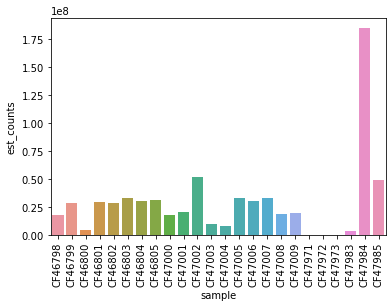

In [44]:
all_counts_df = df.groupby('sample',as_index=False).sum()
all_counts_df[['tpm']]
g = sns.barplot(x=all_counts_df['sample'],y=all_counts_df['est_counts'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [47]:
sample_df

,sample,sample2,sample_type
0,CF46798,13-102191,RNA from FFPE
1,CF46799,A-16552,RNA from FFPE
2,CF46800,13-10118,RNA from FFPE
3,CF46801,16-28916,RNA from FFPE
4,CF46802,17-10581,RNA from FFPE
5,CF46803,15-1243B,RNA from FFPE
6,CF46804,17-13391,RNA from FFPE
7,CF46805,15-22128A,RNA from FFPE
8,CF47000,15-36663,RNA from FFPE
9,CF47001,14-31904,RNA from FFPE
